## Estimadores ML con 20 variables

In [73]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [74]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [75]:
# Cargamos el dataset anterior
dataset = pd.read_csv("df1_eda.csv")
dataset

idClient  Score CountryLocation  Gender  Age  Tenure  Games Balance  \
0            1    619          France       1   42       2           0.00   
1            2    608           Spain       1   41       1       83807.86   
2            3    502          France       1   42       8      159660.80   
3            4    699          France       1   39       1           0.00   
4            5    850           Spain       1   43       2      125510.82   
...        ...    ...             ...     ...  ...     ...            ...   
9995      9996    771          France       0   39       5           0.00   
9996      9997    516          France       0   35      10       57369.61   
9997      9998    709          France       1   36       7           0.00   
9998      9999    772         Germany       0   42       3       75075.31   
9999     10000    792          France       1   28       4      130142.79   

      NumOfProducts  HasPremiumAccess  IsActiveMember  Cumulative score  \
0                 1                 1               1         101348.88   
1                 1                 0               1         112542.58   
2                 3                 1               0         113931.57   
3                 2                 0               0          93826.63   
4                 1                 1               1          79084.10   
...             ...               ...             ...               ...   
9995              2                 1               0          96270.64   
9996              1                 1               1         101699.77   
9997              1                 0               1          42085.58   
9998              2                 1               0          92888.52   
9999              1                 1               0          38190.78   

      Churn ScoreGroup     AgeGroup GamesBalanceGroup CumScoreGroup  
0         1       GOLD  Young Adult               LOW        Expert  
1         0       GOLD  Young Adult            MEDIUM        Expert  
2         1     SILVER  Young Adult      INTERMEDIATE        Expert  
3         0       GOLD  Young Adult               LOW  Intermediate  
4         0   PLATINUM  Young Adult      INTERMEDIATE  Intermediate  
...     ...        ...          ...               ...           ...  
9995      0   PLATINUM  Young Adult               LOW  Intermediate  
9996      0     SILVER      Student               LOW        Expert  
9997      1       GOLD  Young Adult               LOW        Rookie  
9998      1   PLATINUM  Young Adult            MEDIUM  Intermediate  
9999      0   PLATINUM      Student      INTERMEDIATE        Rookie  

[10000 rows x 16 columns]

## Procesado
https://scikit-learn.org/stable/modules/preprocessing.html

In [76]:
# Seleccionamos las variables numéricas
num_features = dataset.select_dtypes(include=[np.number])
num_features.dtypes

idClient              int64
Score                 int64
Gender                int64
Age                   int64
Tenure                int64
Games Balance       float64
NumOfProducts         int64
HasPremiumAccess      int64
IsActiveMember        int64
Cumulative score    float64
Churn                 int64
dtype: object

In [77]:
from sklearn import preprocessing

In [78]:
columnasX = ['Score', 'Age','Tenure',
           'Games Balance','NumOfProducts',
           'Cumulative score']

In [79]:
# Data normalization
normalized_X = preprocessing.normalize(dataset[columnasX])
normalized_X

array([[6.10750116e-03, 4.14402340e-04, 1.97334448e-05, 0.00000000e+00,
        9.86672238e-06, 9.99981263e-01],
       [4.33292479e-03, 2.92187362e-04, 7.12652104e-06, 5.97258477e-01,
        7.12652104e-06, 8.02037064e-01],
       [2.55935218e-03, 2.14129067e-04, 4.07864889e-05, 8.14000431e-01,
        1.52949333e-05, 5.80858589e-01],
       ...,
       [1.68442289e-02, 8.55278194e-04, 1.66304093e-04, 0.00000000e+00,
        2.37577276e-05, 9.99857746e-01],
       [6.46366317e-03, 3.51650069e-04, 2.51178621e-05, 6.28577094e-01,
        1.67452414e-05, 7.77720344e-01],
       [5.83928708e-03, 2.06439442e-04, 2.94913489e-05, 9.59521607e-01,
        7.37283723e-06, 2.81574404e-01]])

In [80]:
# Data Standardization
standarization_X = preprocessing.scale(dataset[columnasX])
standarization_X

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.02188649],
       [-0.44003595,  0.19816383, -1.38753759,  0.11735002, -0.91158349,
         0.21653375],
       [-1.53679418,  0.29351742,  1.03290776,  1.33305335,  2.52705662,
         0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, -1.22584767, -0.91158349,
        -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, -0.02260751,  0.80773656,
        -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386,  0.85996499, -0.91158349,
        -1.07636976]])

In [81]:
for stand in columnasX:
    dataset[stand] = preprocessing.scale(dataset[stand], axis=0,
                       with_mean=True,
                       with_std=True)

In [82]:
dataset.head(10)

idClient     Score CountryLocation  Gender       Age    Tenure  \
0         1 -0.326221          France       1  0.293517 -1.041760   
1         2 -0.440036           Spain       1  0.198164 -1.387538   
2         3 -1.536794          France       1  0.293517  1.032908   
3         4  0.501521          France       1  0.007457 -1.387538   
4         5  2.063884           Spain       1  0.388871 -1.041760   
5         6 -0.057205           Spain       0  0.484225  1.032908   
6         7  1.774174          France       0  1.056346  0.687130   
7         8 -2.840488         Germany       1 -0.946079 -0.350204   
8         9 -1.547141          France       0  0.484225 -0.350204   
9        10  0.346319          France       0 -1.136786 -1.041760   

   Games Balance  NumOfProducts  HasPremiumAccess  IsActiveMember  \
0      -1.225848      -0.911583                 1               1   
1       0.117350      -0.911583                 0               1   
2       1.333053       2.527057                 1               0   
3      -1.225848       0.807737                 0               0   
4       0.785728      -0.911583                 1               1   
5       0.597329       0.807737                 1               0   
6      -1.225848       0.807737                 1               1   
7       0.618019       4.246377                 1               0   
8       1.050820       0.807737                 0               1   
9       0.931463      -0.911583                 1               1   

   Cumulative score  Churn ScoreGroup     AgeGroup GamesBalanceGroup  \
0          0.021886      1       GOLD  Young Adult               LOW   
1          0.216534      0       GOLD  Young Adult            MEDIUM   
2          0.240687      1     SILVER  Young Adult      INTERMEDIATE   
3         -0.108918      0       GOLD  Young Adult               LOW   
4         -0.365276      0   PLATINUM  Young Adult      INTERMEDIATE   
5          0.863650      1       GOLD  Young Adult            MEDIUM   
6         -1.565487      0   PLATINUM        Adult               LOW   
7          0.334854      1     BRONCE      Student            MEDIUM   
8         -0.437329      0     SILVER  Young Adult      INTERMEDIATE   
9         -0.493230      0       GOLD      Student      INTERMEDIATE   

  CumScoreGroup  
0        Expert  
1        Expert  
2        Expert  
3  Intermediate  
4  Intermediate  
5   GrandMaster  
6   Entry-Level  
7        Expert  
8        Novice  
9        Novice

## Binarización

In [83]:
# Evaluamos las variables categoricas
cat_feature = dataset.dtypes == object

# Guardamos las variables categóricas en un array
cat_cols = dataset.columns[cat_feature].tolist()

# Binarizamos
dataset = pd.get_dummies(dataset, columns=cat_cols)

# Observaremos los resultados
dataset.head(10)

idClient     Score  Gender       Age    Tenure  Games Balance  \
0         1 -0.326221       1  0.293517 -1.041760      -1.225848   
1         2 -0.440036       1  0.198164 -1.387538       0.117350   
2         3 -1.536794       1  0.293517  1.032908       1.333053   
3         4  0.501521       1  0.007457 -1.387538      -1.225848   
4         5  2.063884       1  0.388871 -1.041760       0.785728   
5         6 -0.057205       0  0.484225  1.032908       0.597329   
6         7  1.774174       0  1.056346  0.687130      -1.225848   
7         8 -2.840488       1 -0.946079 -0.350204       0.618019   
8         9 -1.547141       0  0.484225 -0.350204       1.050820   
9        10  0.346319       0 -1.136786 -1.041760       0.931463   

   NumOfProducts  HasPremiumAccess  IsActiveMember  Cumulative score  ...  \
0      -0.911583                 1               1          0.021886  ...   
1      -0.911583                 0               1          0.216534  ...   
2       2.527057                 1               0          0.240687  ...   
3       0.807737                 0               0         -0.108918  ...   
4      -0.911583                 1               1         -0.365276  ...   
5       0.807737                 1               0          0.863650  ...   
6       0.807737                 1               1         -1.565487  ...   
7       4.246377                 1               0          0.334854  ...   
8       0.807737                 0               1         -0.437329  ...   
9      -0.911583                 1               1         -0.493230  ...   

   GamesBalanceGroup_LOW  GamesBalanceGroup_MEDIUM  CumScoreGroup_Commodoro  \
0                      1                         0                        0   
1                      0                         1                        0   
2                      0                         0                        0   
3                      1                         0                        0   
4                      0                         0                        0   
5                      0                         1                        0   
6                      1                         0                        0   
7                      0                         1                        0   
8                      0                         0                        0   
9                      0                         0                        0   

   CumScoreGroup_Entry-Level  CumScoreGroup_Expert  CumScoreGroup_GrandMaster  \
0                          0                     1                          0   
1                          0                     1                          0   
2                          0                     1                          0   
3                          0                     0                          0   
4                          0                     0                          0   
5                          0                     0                          1   
6                          1                     0                          0   
7                          0                     1                          0   
8                          0                     0                          0   
9                          0                     0                          0   

   CumScoreGroup_Intermediate  CumScoreGroup_Master  CumScoreGroup_Novice  \
0                           0                     0                     0   
1                           0                     0                     0   
2                           0                     0                     0   
3                           1                     0                     0   
4                           1                     0                     0   
5                           0                     0                     0   
6                           0                     0                     0   
7                           

In [84]:
dataset.columns.tolist()

['idClient',
 'Score',
 'Gender',
 'Age',
 'Tenure',
 'Games Balance',
 'NumOfProducts',
 'HasPremiumAccess',
 'IsActiveMember',
 'Cumulative score',
 'Churn',
 'CountryLocation_France',
 'CountryLocation_Germany',
 'CountryLocation_Spain',
 'ScoreGroup_BRONCE',
 'ScoreGroup_GOLD',
 'ScoreGroup_PLATINUM',
 'ScoreGroup_SILVER',
 'AgeGroup_Adult',
 'AgeGroup_Mid-Senior',
 'AgeGroup_Senior',
 'AgeGroup_Student',
 'AgeGroup_Teenager',
 'AgeGroup_Young Adult',
 'GamesBalanceGroup_HIGH',
 'GamesBalanceGroup_INTERMEDIATE',
 'GamesBalanceGroup_LOW',
 'GamesBalanceGroup_MEDIUM',
 'CumScoreGroup_Commodoro',
 'CumScoreGroup_Entry-Level',
 'CumScoreGroup_Expert',
 'CumScoreGroup_GrandMaster',
 'CumScoreGroup_Intermediate',
 'CumScoreGroup_Master',
 'CumScoreGroup_Novice',
 'CumScoreGroup_Rookie']

## Correlación

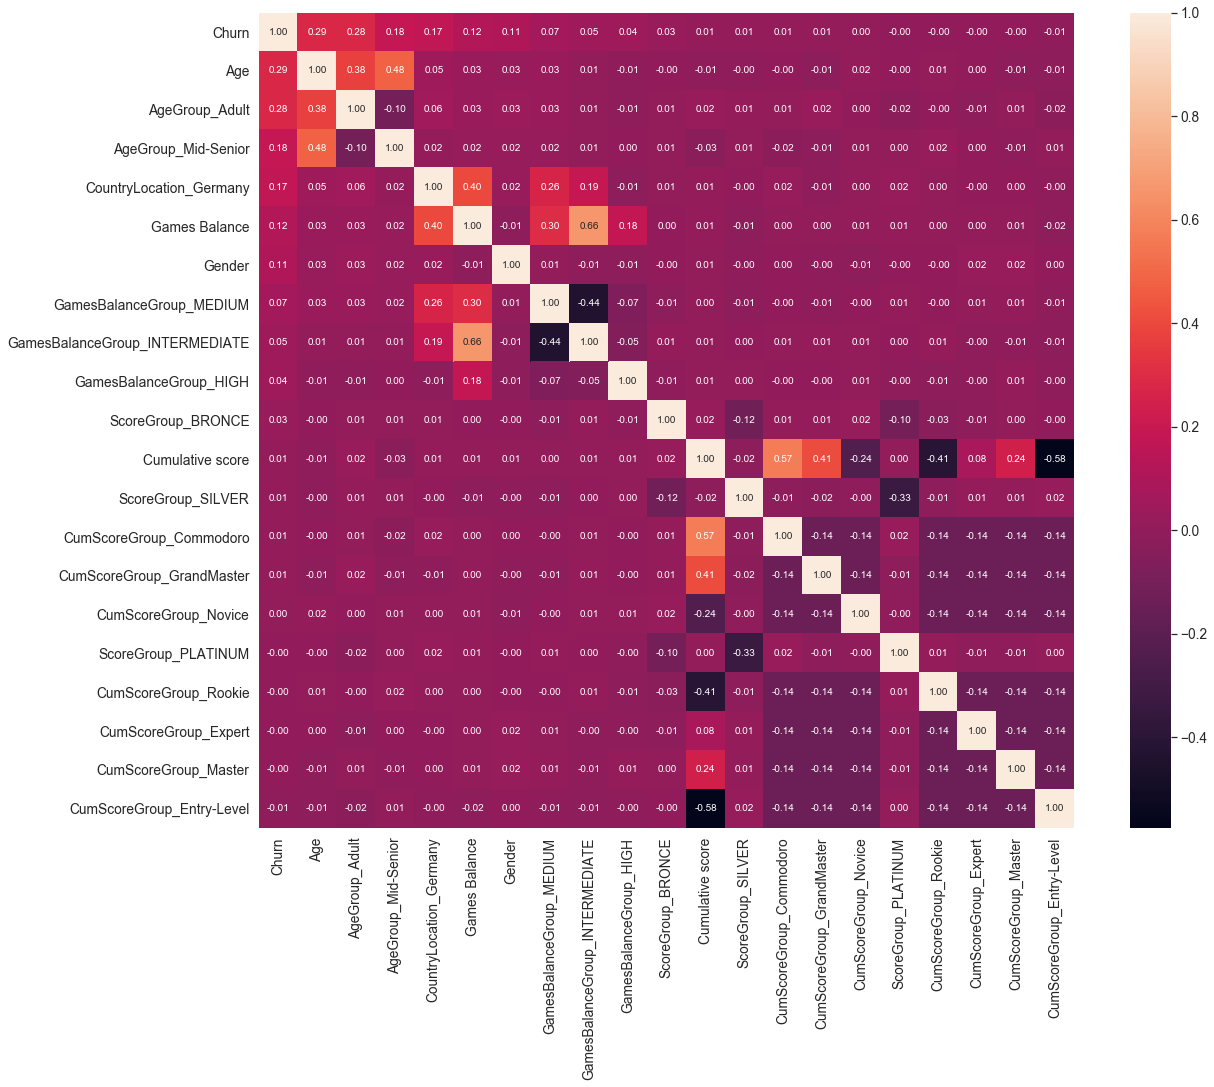

In [72]:
#churn correlation matrix
k = 21 #number of variables for heatmap
plt.figure(figsize=(20,15))
corrmat = dataset.corr()
# picking the top 20 correlated features
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Modelado

In [58]:
# Features 20 variables
cols 

Index(['Churn', 'Age', 'AgeGroup_Adult', 'AgeGroup_Mid-Senior',
       'CountryLocation_Germany', 'Games Balance', 'Gender',
       'GamesBalanceGroup_MEDIUM', 'GamesBalanceGroup_INTERMEDIATE',
       'GamesBalanceGroup_HIGH', 'ScoreGroup_BRONCE', 'Cumulative score',
       'ScoreGroup_SILVER', 'CumScoreGroup_Commodoro',
       'CumScoreGroup_GrandMaster', 'CumScoreGroup_Novice',
       'ScoreGroup_PLATINUM', 'CumScoreGroup_Rookie', 'CumScoreGroup_Expert',
       'CumScoreGroup_Master', 'CumScoreGroup_Entry-Level', 'HasPremiumAccess',
       'Tenure', 'CumScoreGroup_Intermediate', 'idClient', 'ScoreGroup_GOLD',
       'AgeGroup_Senior', 'Score', 'AgeGroup_Young Adult', 'NumOfProducts',
       'CountryLocation_Spain', 'AgeGroup_Teenager', 'CountryLocation_France',
       'GamesBalanceGroup_LOW', 'IsActiveMember', 'AgeGroup_Student'],
      dtype='object')

In [17]:
X = dataset[cols]
X
##val = dataset['idClient']
X.drop(['Churn'], axis=1, inplace=True)

In [16]:
y = dataset['Churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churn, Length: 10000, dtype: int64

In [18]:
# Train and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
X_train

Age  AgeGroup_Adult  AgeGroup_Mid-Senior  CountryLocation_Germany  \
9254 -0.660018               0                    0                        0   
1561  0.293517               0                    0                        1   
1670 -1.422847               0                    0                        0   
6087 -1.136786               0                    0                        0   
6669  1.628468               0                    1                        0   
...        ...             ...                  ...                      ...   
5734  1.437761               1                    0                        0   
5191  1.819175               0                    1                        0   
5390 -0.087897               0                    0                        0   
860   0.388871               0                    0                        0   
7270  1.151700               1                    0                        1   

      Games Balance  Gender  GamesBalanceGroup_MEDIUM  \
9254      -1.225848       0                         0   
1561       0.691389       0                         1   
1670       0.613102       0                         1   
6087       0.948021       1                         0   
6669       1.052363       0                         0   
...             ...     ...                       ...   
5734      -0.108554       0                         1   
5191      -1.225848       1                         0   
5390      -1.225848       1                         0   
860        1.822949       0                         0   
7270       1.144727       0                         0   

      GamesBalanceGroup_INTERMEDIATE  GamesBalanceGroup_HIGH  \
9254                               0                       0   
1561                               0                       0   
1670                               0                       0   
6087                               1                       0   
6669                               1                       0   
...                              ...                     ...   
5734                               0                       0   
5191                               0                       0   
5390                               0                       0   
860                                0                       1   
7270                               1                       0   

      ScoreGroup_BRONCE  Cumulative score  ScoreGroup_SILVER  \
9254                  0          1.373784                  0   
1561                  0          1.667407                  0   
1670                  0         -0.246910                  1   
6087                  0          0.921446                  1   
6669                  0         -1.053812                  1   
...                 ...               ...                ...   
5734                  0         -0.534002                  0   
5191                  0         -1.728184                  0   
5390                  0         -0.136854                  0   
860                   0         -0.044902                  0   
7270                  0         -0.808747                  0   

      CumScoreGroup_Commodoro  CumScoreGroup_GrandMaster  \
9254                        1                          0   
1561                        1                          0   
1670                        0                          0   
6087                        0                          1   
6669                        0                          0   
...                       ...                        ...   
5734                        0                          0   
5191                        0                          0   
5390                        0                          0   
860                         0                          0   
7270                        0                          0   

      CumScoreGroup_Novice  ScoreGroup_PLATINUM  CumScoreGroup_Rookie  \
9254                     0       

In [22]:
X_train.shape, y_train.shape

((8000, 20), (8000,))

## Logistic Regression

In [23]:
model = LogisticRegression().fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predicted_log = model.predict(X_test)
predicted_log

array([0, 0, 0, ..., 0, 0, 0])

## Modeling Score

Accuracy

In [25]:
performance_auc = {}

In [1]:
y_test # es un array binario (0 - 1)

NameError: name 'y_test' is not defined

In [26]:
logreg_score = round(model.score(X_train, y_train) * 100, 2)
print(logreg_score)
print(classification_report(y_test, predicted_log))

81.66
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1607
           1       0.59      0.29      0.39       393

    accuracy                           0.82      2000
   macro avg       0.72      0.62      0.64      2000
weighted avg       0.80      0.82      0.80      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

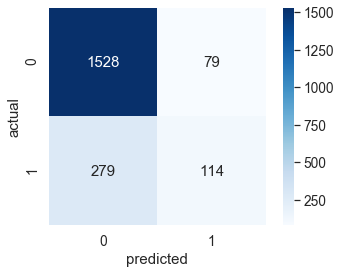

In [27]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

# RATIOS de matriz de confusión

- 00 = TN TRUE NEGATIVE ( predijimos que no, y no tienen CHURN)
- 01 = FP FALSE POSITIVE ( predijimos que sí, pero en realidad no tienen CHURN) llamados ERROR TIPO I
- 10 = FN FALSE NEGATIVE (predijimos que no, pero en realidad tienen CHURN) llamado ERROR TIPO II
- 11 = TP TRUE POSITIVE (predijimos que sí, y efectivamente tienen CHURN)

* ACCURACY = (TP+TN) / total = con qué frecuencia es correcto el clasificador?
* Clasificación erronea = (FP+FN) / total = con qué frecuencia está mal?
* Sensitivity o Recall = TP  / actuales SI = con qué frecuencia predice SI cuando es SI
* Falsos Positivos = (FP) / actuales NO = con qué frecuencia predice SI cuando es NO
* Negativos Verdaderos = (TN) / actuales NO = con qué frecuencia predice NO cuando es NO
* Precisión = (TP) / predicciones SI = con qué frecuencia es correcta la predicción SI

In [28]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc["Regression Logistic"] = roc_auc

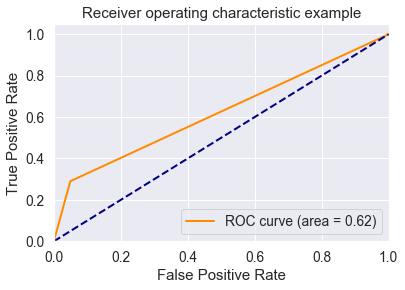

In [29]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Estimadores de Machine Learning - scikitLearn
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Decision tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [30]:
model = DecisionTreeClassifier().fit(X_train, y_train)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
predicted_dt = model.predict(X_test)
predicted_dt

array([0, 0, 0, ..., 1, 0, 1])

In [32]:
# Score
dt_score = round(model.score(X_train, y_train)*100, 2)
print(dt_score)
print(classification_report(y_test, predicted_dt))

100.0
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1607
           1       0.36      0.39      0.38       393

    accuracy                           0.74      2000
   macro avg       0.60      0.61      0.61      2000
weighted avg       0.75      0.74      0.75      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

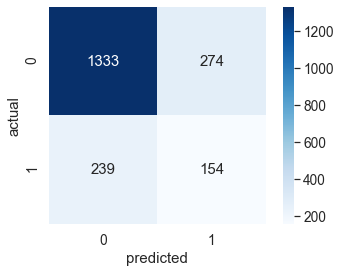

In [33]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [34]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc["Decision Tree"] = roc_auc

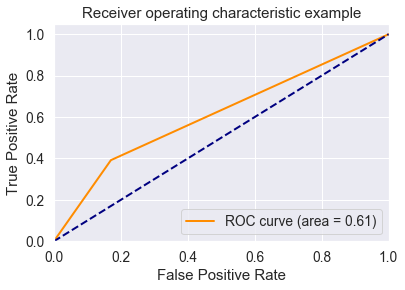

In [35]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Random forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [36]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
predicted_rf = model.predict(X_test)
predicted_rf

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
rf_score = round(model.score(X_train, y_train)*100, 2)
print(rf_score)
print(classification_report(y_test, predicted_rf))

79.45
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

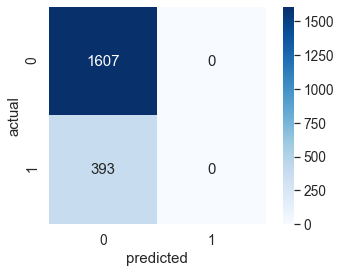

In [39]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [40]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_rf)
roc_auc = auc(fpr, tpr)
performance_auc["Random Forest"] = roc_auc

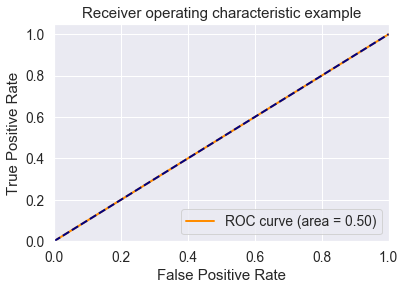

In [41]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## k-nearest neighbors

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

source [wikipedia - k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [42]:
model = KNeighborsClassifier(5).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
predicted_knn = model.predict(X_test)
predicted_knn

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
# Score
knn_score = round(model.score(X_train, y_train)*100, 2)
print(knn_score)
print(classification_report(y_test, predicted_knn))

85.02
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1607
           1       0.49      0.31      0.38       393

    accuracy                           0.80      2000
   macro avg       0.67      0.62      0.63      2000
weighted avg       0.78      0.80      0.78      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

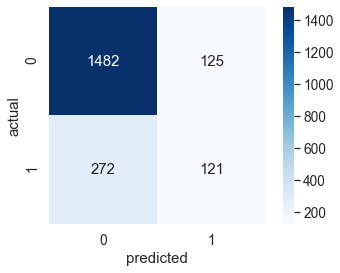

In [45]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [46]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc["KNN"] = roc_auc

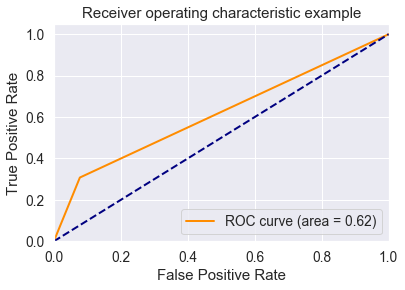

In [47]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

source [wikipedia - SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

In [48]:
model = SVC(probability=True).fit(X_train, y_train)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [49]:
predicted_svc = model.predict(X_test)
predicted_svc

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
# Score
svc_score = round(model.score(X_train, y_train)*100, 2)
print(svc_score)
print(classification_report(y_test, predicted_svc))

82.25
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.66      0.26      0.37       393

    accuracy                           0.83      2000
   macro avg       0.75      0.61      0.63      2000
weighted avg       0.81      0.83      0.80      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

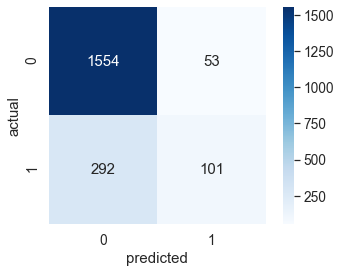

In [51]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_svc)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [52]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_svc)
roc_auc = auc(fpr, tpr)
performance_auc["SVM"] = roc_auc

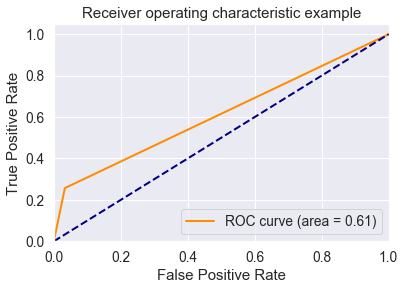

In [53]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Evaluación de los modelos

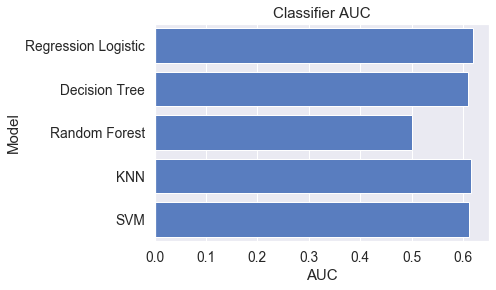

In [54]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [55]:
models = pd.DataFrame({
    'Models': ['KNN','SVC','RF','DT','LR'],
    'Score':[knn_score,svc_score,rf_score,dt_score,logreg_score]})
models.sort_values(by='Score', ascending=False)

Models   Score
3     DT  100.00
0    KNN   85.02
1    SVC   82.25
4     LR   81.66
2     RF   79.45

## K-fold Cross-Validation

Jugar con n_split= 2, 4, 8, 10, 15, 20, 25, 50, 100

In [112]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=2)

In [101]:
# GBC Classifier
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.8275 0.805  0.83   0.82   0.83   0.805  0.8075 0.825  0.82   0.835
 0.825  0.82   0.8025 0.845  0.8175 0.815  0.8275 0.825  0.8175 0.81  ]


82.05

In [102]:
# Linear Discriminant Analysis 
LDA_Model= LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.8475 0.7675 0.84   0.81   0.805  0.78   0.8075 0.815  0.8125 0.835
 0.81   0.815  0.805  0.83   0.79   0.795  0.825  0.805  0.81   0.81  ]


81.08

In [103]:
# Logistic Regression
#
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.8325 0.8075 0.83   0.815  0.8075 0.815  0.8125 0.825  0.815  0.82
 0.8125 0.8225 0.8    0.845  0.7975 0.8025 0.8325 0.7975 0.8125 0.815 ]


81.59

In [104]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.7825 0.78   0.7925 0.79   0.7675 0.78   0.7875 0.79   0.795  0.825
 0.8025 0.81   0.7625 0.8125 0.795  0.785  0.7925 0.7675 0.795  0.775 ]


78.94

In [105]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.83   0.8125 0.825  0.8125 0.8225 0.8075 0.82   0.8225 0.82   0.825
 0.7975 0.82   0.7975 0.8375 0.8    0.81   0.8225 0.8125 0.8075 0.805 ]


81.54

In [106]:
# Decision Tree
DT_Model = DecisionTreeClassifier()

scores = cross_val_score(DT_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.755  0.72   0.7225 0.7675 0.7175 0.7175 0.7375 0.7675 0.7425 0.75
 0.755  0.7375 0.72   0.75   0.7575 0.735  0.73   0.725  0.705  0.7225]


73.68

In [107]:
# KNN
KNN_Model = KNeighborsClassifier(6)

scores = cross_val_score(KNN_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.8025 0.785  0.8025 0.8025 0.8025 0.795  0.8025 0.7975 0.805  0.815
 0.8075 0.8025 0.79   0.82   0.8    0.7975 0.8    0.77   0.8025 0.795 ]


79.97

In [109]:
# AdaBoost
Ada_Model = AdaBoostClassifier(DecisionTreeClassifier())

scores = cross_val_score(Ada_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.755  0.72   0.7175 0.7675 0.7125 0.735  0.7375 0.77   0.7225 0.74
 0.765  0.76   0.72   0.76   0.7675 0.735  0.7275 0.7225 0.7125 0.72  ]


73.84

In [110]:
# MultipleLayerPerceptron
MLP_Model = MLPClassifier()

scores = cross_val_score(MLP_Model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.8275 0.805  0.8025 0.81   0.8    0.795  0.82   0.805  0.825  0.8325
 0.805  0.8325 0.7975 0.8175 0.7975 0.8075 0.825  0.7975 0.825  0.78  ]


81.04

# Hyperparameter Tuning <a class="anchor" id="12-bullet"></a>
<hr>

I decided to choose this promising models of GradientBoosting, Linear Discriminant Analysis, RandomForest, Logistic Regression and SVM for the ensemble modeling. So, now we need to fine-tune them.

One way to do that would be to fiddle with the hyperparameters manually until we find a great combination of hyperparamerter values. This would be very tedious work, and we may not have time to explore many combination. Instead we should get `Scikit-Learn's GridSearchCV` to search for us. All we need to do is tell it which hyperparameters we want it to experiment with, and what values to try out and it will evaluate all the possible combination of hyperparameter values, using **cross-validation**.

Here we perform grid search optimization for GradientBoosting, RandomForest,  Linear Discriminant Analysis, Logistic Regression and SVC classifier.

In [113]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   56.4s
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed:  2.1min finished


0.8215

In [115]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.4s
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:   39.0s finished


0.8186249999999999

In [116]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.2s finished


0.810625

In [117]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.3min finished


0.815375

##  Plot Learning Curves <a class="anchor" id="13-bullet"></a>
**Diagnose Bias and Variance to Reduce Error**
<hr>
Learning curves are a good way to see the overfitting and underfitting effect on the training set and the effect of the training size on the accuracy. Learning curves plots the model's performance on the training set and the validation set as a function of training set size. To generate the plots, we simply train the model several times on different sized subsets of the training sets. In a nutshell, a learning curves shows how error changes as the training set size increases.

If a models perform well on the training data but generalizes poorly according to the cross-validation metrics, the model is called overfitting. And again if it performs poorly on both, the model is called underfitting.

When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error will be initially quite big.

> **Underfitting**: If model is underfitting the training data, adding more training example will not help. We need to use more complex model or come up with better features.

> **Overfitting**: One way to improve the overfitting model is to feed it more training data until the validation error reaches the training error.

**Resource**
- [Learning Curves for Machine Learning](https://www.dataquest.io/blog/learning-curves-machine-learning/)


## Bias-Variance Trade-Off
<hr>
A model's generalization error can be expressed as the sum of three very different errors.

- Bias
- Variance
- Irreducible Error

#### Bias Error in Learning Curve
This part of generalization error is due to the wrong assumption, such as assuming that, the data is linear when it is actually quadratic.

- **A high bias model is most likely to underfit the training data**


#### Variance Error in Learning Curve
This part of generalization is due to the model is excessive sensitivity to small variations in the training data.

- **A high variance model is most likely to overfit the training data**

#### Irreducible Error in Learning Curve
This is due to the noisiness of the data itself. This is not concern now, because we already clean the data sets.

<hr>

Increasing a model's complexity will typically increases its variance and reduce its bias. Conversly, reducing a model's complexity increases its bias and reduces its variance.


Now, we'll define a learning curve ploting function where `x` and `y` axies will be traning set size and scores (not errors) gradually. So the higher the score, the better the performance of the model.

In [118]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

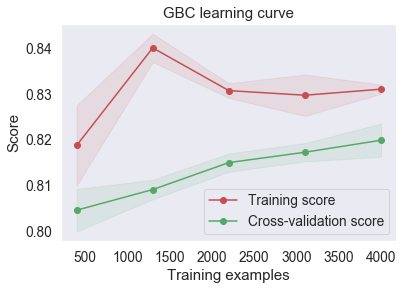

In [120]:
# Gradient boosting - Learning Curve (alternativa al Random Forest)
plot_learning_curve(estimator = gsGBC.best_estimator_,title = "GBC learning curve",
                    X = X_train, y = y_train, cv = K_fold);

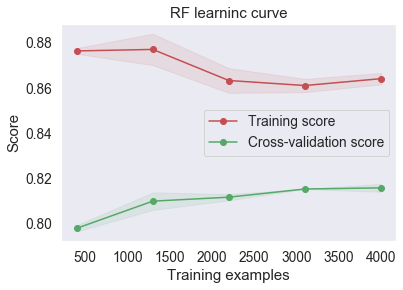

In [122]:
# Random Forest - Learning Curve
plot_learning_curve(estimator = gsRFC.best_estimator_ ,title = "RF learninc curve",
                    X = X_train, y = y_train, cv = K_fold);

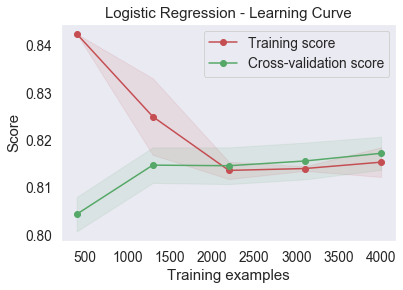

In [123]:
# Logistic Regression - Learning Curve    gsLRM.best_estimator_
plot_learning_curve(estimator = Log_Model ,title = "Logistic Regression - Learning Curve",
                    X = X_train, y = y_train, cv = K_fold);

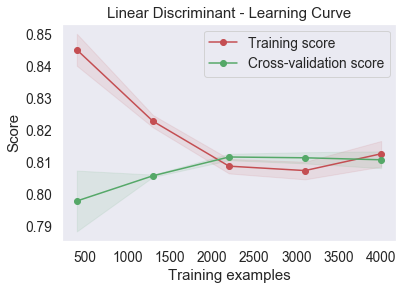

In [124]:
# Linear Discriminant Analysis - Learning Curve
plot_learning_curve(estimator = gsLDA.best_estimator_ ,title = "Linear Discriminant - Learning Curve",
                    X = X_train, y = y_train, cv = K_fold);

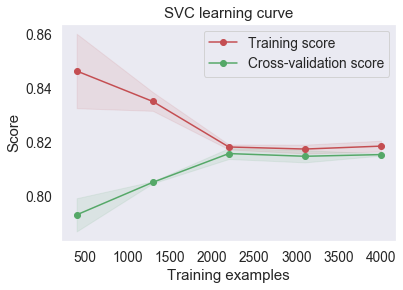

In [125]:
# Support Vector Machine - Learning Curve
plot_learning_curve(estimator = gsSVMC.best_estimator_,title = "SVC learning curve",
                    X = X_train, y = y_train, cv = K_fold);

# Ensemble modeling <a class="anchor" id="14-bullet"></a>
<hr>

The another way to fine-tune our system is to try to combine the models that perform best. The goup will often perform better than the best individual model, especially if the individual models make very different types of errors.

Building a model on top of many other models are called Ensemble Learning. And it is often a great way to push ML algorithm even further.

I used **voting classifier** to combine the predictions coming from the 5 classifiers. I preferred to pass the argument `soft` to the voting parameter to take into account the probability of each vote.

In [129]:
## With 3 algorithms - #about 85%

VotingPredictor_1 = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best),
                           ('svc', SVMC_best)],
                           voting='hard', n_jobs = 4)

VotingPredictor_1 = VotingPredictor_1.fit(X_train, y_train)

scores = cross_val_score(VotingPredictor_1, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

[0.823  0.8155]
81.92


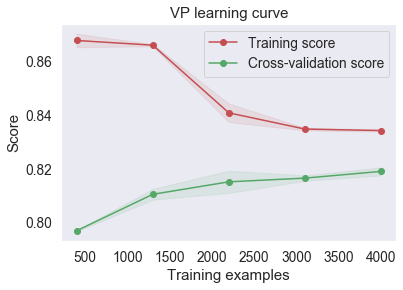

In [130]:
# Voting Predictor - Learning Curve
plot_learning_curve(estimator = VotingPredictor_1, title = "VP learning curve",
                    X = X_train, y = y_train, cv = K_fold);

In [131]:
VotingPredictor_1

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=20,
                                                     min_weight_fraction_leaf=0.0,
      

## Validación

In [132]:
predictedVP1 = VotingPredictor_1.predict(X_test)
predictedVP1

array([0, 0, 0, ..., 0, 0, 0])

2000

# Resultados

In [140]:
output = pd.DataFrame({
    'IDs':   #dataset['idClient']
    'Churn': predictedVP1 #resultado predicción
})
output

SyntaxError: invalid syntax (<ipython-input-140-d9bb9b9a26df>, line 3)